In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv
/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_csv('/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv', encoding='latin-1')
test_df = pd.read_csv('/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv', encoding='latin-1')

In [4]:
train_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [5]:
test_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


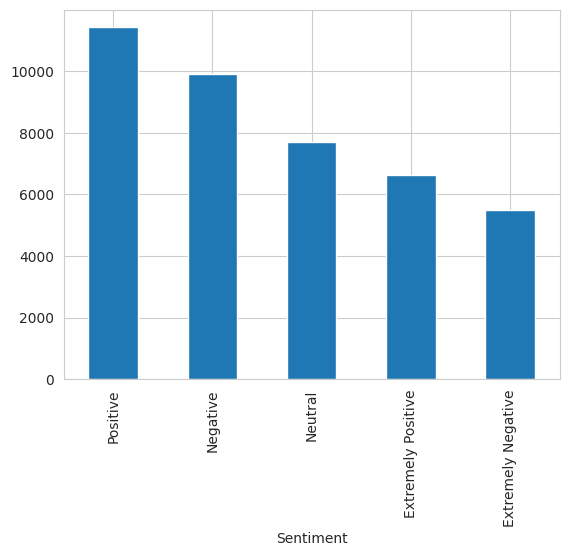

In [6]:
sns.set_style(style='whitegrid')
train_df['Sentiment'].value_counts().plot(kind='bar');

In [7]:
train_df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [8]:
train_df = train_df.drop(
    columns=['UserName','ScreenName','Location','TweetAt'],
    axis=1
)

In [9]:
train_df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [10]:
train_df['OriginalTweet'].iloc[1]

'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order'

In [11]:
train_df['OriginalTweet'].duplicated().sum()

0

In [12]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def clean_text(text):
    # Remove HTML tags and special characters
    text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters except spaces

    # Convert uppercase to lowercase
    text = text.lower()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    cleaned_words = [word for word in words if word not in stop_words]
    cleaned_text = ' '.join(cleaned_words)

    return cleaned_text


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
train_df['CleanedTweet'] = train_df['OriginalTweet'].apply(clean_text)

In [14]:
train_df.head()

,OriginalTweet,Sentiment,CleanedTweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie philgahan chrisitv httpstcoifz9fan2pa...
1,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...
2,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...
3,My food stock is not the only one which is emp...,Positive,food stock one empty please dont panic enough ...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready go supermarket covid19 outbreak im paran...


# Preprocessing

In [15]:
# now change the dataset input numbers
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()
train_df['Senti_Label']=le.fit_transform(train_df['Sentiment'])

In [17]:
train_df.head()

,OriginalTweet,Sentiment,CleanedTweet,Senti_Label
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie philgahan chrisitv httpstcoifz9fan2pa...,3
1,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...,4
2,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...,4
3,My food stock is not the only one which is emp...,Positive,food stock one empty please dont panic enough ...,4
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready go supermarket covid19 outbreak im paran...,0


In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import warnings as wn
wn.filterwarnings('ignore')

2024-04-25 18:12:28.913197: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-25 18:12:28.913297: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-25 18:12:28.996834: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [19]:
texts = train_df['CleanedTweet'].tolist()

vocab_size = 50000  # Adjust as needed
max_length = 20    # Adjust as needed


# Define tokenizer
tokenizer = Tokenizer(num_words=vocab_size,oov_token='<OOV>')
tokenizer.fit_on_texts(texts)

# Tokenize text
sequences = tokenizer.texts_to_sequences(texts)
pad_seq = pad_sequences(
    sequences=sequences,
    maxlen=max_length,
    padding='post'
)

In [20]:
pad_seq[5]

array([16413,   765,   113,    89,     9, 11167,   507,    49,   575,
         558,   110,    29,    23,     5,    43,    45,   201, 23730,
         360, 23731], dtype=int32)

# Apply Model

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.layers import BatchNormalization,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
pad_seq.shape, train_df['Senti_Label'].shape

((41157, 20), (41157,))

In [23]:
y = to_categorical(
    x=train_df['Senti_Label'],
    num_classes=5
)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
pad_seq

array([[23719, 23720, 13082, ...,     0,     0,     0],
       [ 1005,   348,   293, ...,   959,  3345,   151],
       [    2,   713,  1692, ...,     0,     0,     0],
       ...,
       [   61,   144,  1535, ...,     0,     0,     0],
       [  619,  4169,    29, ...,     0,     0,     0],
       [ 2677,  2019,   294, ...,   648,     3,     1]], dtype=int32)

In [26]:
x_train,x_test,y_train,y_test = train_test_split(
    pad_seq,
    y,
    test_size=0.2
)

In [27]:
x_train.shape,x_test.shape

((32925, 20), (8232, 20))

In [28]:


emb_dim = 16

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=emb_dim, input_length=max_length))
model.add(LSTM(units=20, activation='relu', return_sequences=True))
model.add(LSTM(units=20, activation='relu', return_sequences=False))
model.add(BatchNormalization())
model.add(Dense(units=5, activation='softmax'))
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size=64,
    epochs=10,
    validation_data=(x_test,y_test),
    callbacks=early_stopping
)

Epoch 1/10
 15/515 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2429 - loss: 1.5929

I0000 00:00:1714068767.894918      74 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1714068767.924138      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714068767.925909      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714068767.927701      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3896 - loss: 1.3833

W0000 00:00:1714068774.983163      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714068774.984327      72 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


515/515 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.3898 - loss: 1.3830 - val_accuracy: 0.6430 - val_loss: 0.9688
Epoch 2/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7202 - loss: 0.7591 - val_accuracy: 0.6718 - val_loss: 0.8688
Epoch 3/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8201 - loss: 0.5240 - val_accuracy: 0.6533 - val_loss: 0.9624
Epoch 4/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8840 - loss: 0.3569 - val_accuracy: 0.6413 - val_loss: 1.0786
Epoch 5/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9245 - loss: 0.2440 - val_accuracy: 0.6316 - val_loss: 1.2803


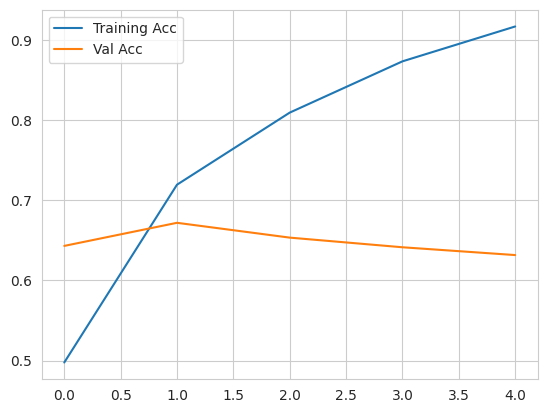

In [30]:
sns.lineplot(history.history['accuracy'],label='Training Acc')
sns.lineplot(history.history['val_accuracy'],label='Val Acc')
plt.show()